In [1]:
#Set Directory
import os 
os.chdir('C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 8')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,plot_confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Read Dataset
df_raw= pd.read_csv(r"C:\Users\jason\OneDrive\Desktop\NCU\8535_Univariate Analysis\Week 8\emotions.csv")

In [4]:
#Add column names

df_raw.columns =['Comments', 'Label']

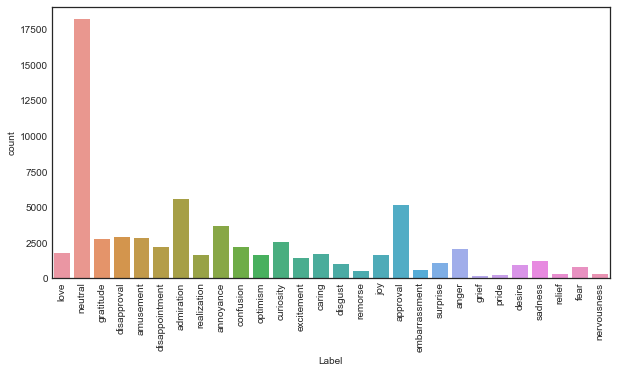

In [5]:
# View distribution of sentiment by labels.
sns.countplot(df_raw.Label)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [6]:
# Create function to encode sentiment labels to fit binary class (positive=1, negative=0)
def custom_encoder(df):
    df_raw.replace(to_replace ="admiration", value =1, inplace=True)
    df_raw.replace(to_replace ="amusement", value =1, inplace=True)
    df_raw.replace(to_replace ="approval", value =1, inplace=True)
    df_raw.replace(to_replace ="caring", value =1, inplace=True)
    df_raw.replace(to_replace ="desire", value =1, inplace=True)
    df_raw.replace(to_replace ="excitement", value =1, inplace=True)
    df_raw.replace(to_replace ="gratitude", value =1, inplace=True)
    df_raw.replace(to_replace ="joy", value =1, inplace=True)
    df_raw.replace(to_replace ="love", value =1, inplace=True)
    df_raw.replace(to_replace ="optimism", value =1, inplace=True)
    df_raw.replace(to_replace ="relief", value =1, inplace=True)
    df_raw.replace(to_replace ="surprise", value =1, inplace=True)
    df_raw.replace(to_replace ="relief", value =1, inplace=True)
    df_raw.replace(to_replace ="surprise", value =1, inplace=True)
    df_raw.replace(to_replace ="pride", value =1, inplace=True)
    df_raw.replace(to_replace ="anger", value =0, inplace=True)
    df_raw.replace(to_replace ="annoyance", value =0, inplace=True)
    df_raw.replace(to_replace ="disappointment", value =0, inplace=True)
    df_raw.replace(to_replace ="disapproval", value =0, inplace=True)
    df_raw.replace(to_replace ="disgust", value =0, inplace=True)
    df_raw.replace(to_replace ="embarrassment", value =0, inplace=True)
    df_raw.replace(to_replace ="fear", value =0, inplace=True)
    df_raw.replace(to_replace ="grief", value =0, inplace=True)
    df_raw.replace(to_replace ="nervousness", value =0, inplace=True)
    df_raw.replace(to_replace ="remorse", value =0, inplace=True)
    df_raw.replace(to_replace ="sadness", value =0, inplace=True)
    df_raw.replace(to_replace ="confusion", value =2, inplace=True)
    df_raw.replace(to_replace ="curiosity", value =2, inplace=True)
    df_raw.replace(to_replace ="neutral", value =2, inplace=True)
    df_raw.replace(to_replace ="realization", value =2, inplace=True)

In [7]:
# Execute custom encoder function against the dataset.
custom_encoder(df_raw['Label'])

In [8]:
#Remove neutral or '2' lables
df = df_raw[df_raw['Label'] != 2] 

In [9]:
df['Label'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Label', ylabel='count'>

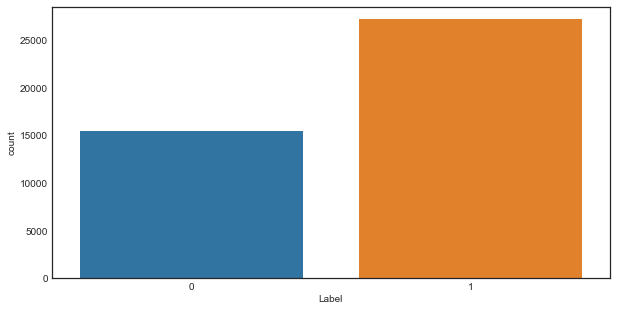

In [10]:
# Result is a dataset with a binary class label.
sns.countplot(df.Label)

In [11]:
df.Label[df.Label == 1].count()

27150

In [12]:
# Create a WordNetLemmatizer
lm = WordNetLemmatizer()

In [13]:
# Create a function to transform the data as follows:

def text_transformation(df_col):
    corpus = []
    for item in df_col:
       # remove punctuation characters.
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        # convert to lower case.
        new_item = new_item.lower()
        new_item = new_item.split()
        # lemmatize and remove stop words.
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        # append to corpus and return as a transformed corpus.
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Assign transformed text to the corpus.
corpus = text_transformation(df['Comments'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


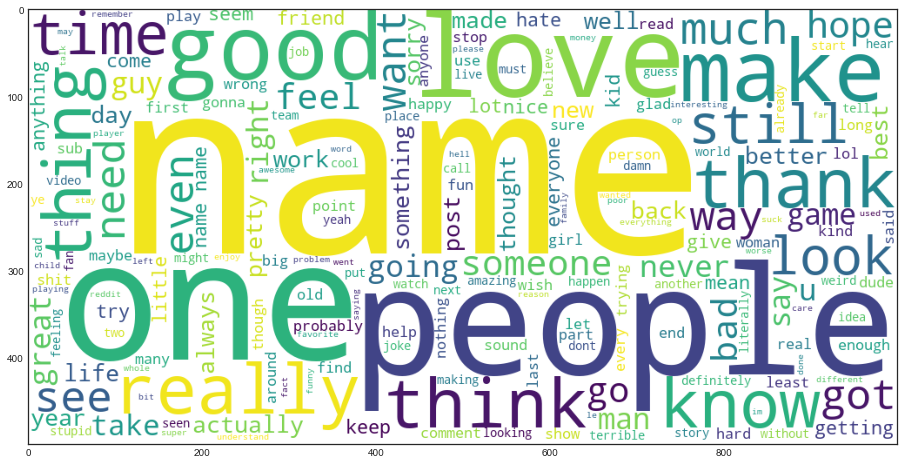

In [15]:
# Create a word cloud to show word density
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [16]:
# Import CountVectorizer to create a Bag of Words (BOW) model. 
# This assists in determining the number of times each word appears.
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Create cv with max 5000 features 
cv = CountVectorizer(max_features = 5000)
data = cv.fit_transform(corpus).toarray()

In [18]:
# Assign X and y
X = data
y = df.Label

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [20]:
###Random Forest##
##Hyperparameter tuning for Random Forest

#from sklearn import model_selection
#from sklearn.ensemble import RandomForestClassifier
## random forest model creation
#rfc = RandomForestClassifier()

#from sklearn.model_selection import RandomizedSearchCV
#import numpy as np
## number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 3000, num = 10)]
## number of features at every split
#max_features = ['auto', 'sqrt', 'log2', 'None']

## max depth
#max_depth = [int(x) for x in np.linspace(50, 2000, num = 11)]
#max_depth.append(None)
## create random grid
#random_grid = {
# 'n_estimators': n_estimators,
# 'max_features': max_features,
# 'max_depth': max_depth
# }
## Random search of parameters
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
## Fit the model
#rfc_random.fit(X_train, y_train)
## print results
#print(rfc_random.best_params_)

In [21]:
#Run Random forest with tuned hyperparmeters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc1 = RandomForestClassifier(n_estimators=50, max_depth=1610, max_features='log2')
rfc1.fit(X_train,y_train)
rfc1_predict = rfc1.predict(X_test)

In [22]:
## Random Forest Model Performance Evaluation
accuracy_score(y_test, rfc1_predict) 

0.7704648871792467

In [23]:
## Random Forest Model Performance Evaluation
f1_score(y_test, rfc1_predict) 

0.8244789611507695

In [24]:
#Create testing dataset
X_test1 = pd.DataFrame(X_test)
test_df = df.iloc[-len(X_test1):]

In [25]:
X_test,y_test = test_df.Comments,test_df.Label
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus).toarray()
#predict the target
predictions = rfc1.predict(testdata)

Accuracy_score:  0.8694000093821832
Precision_score:  0.8829443447037701
Recall_score:  0.9141943638932263
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      7868
           1       0.88      0.91      0.90     13449

    accuracy                           0.87     21317
   macro avg       0.86      0.85      0.86     21317
weighted avg       0.87      0.87      0.87     21317



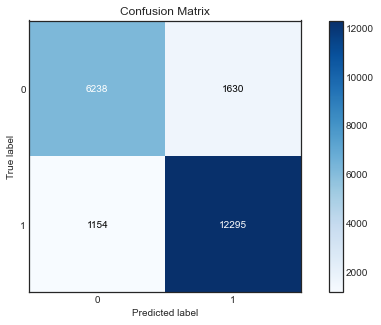

In [26]:
#Confusion Matrix for testing data
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)

In [27]:
predictions_probability = rfc1.predict_proba(testdata)

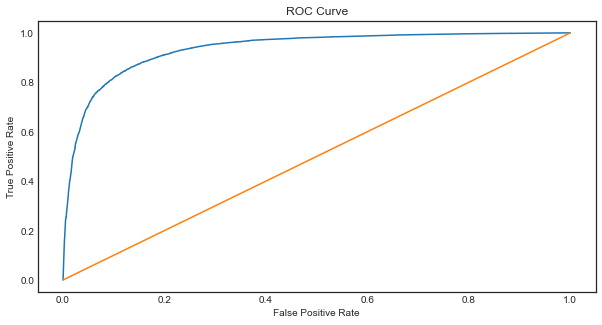

In [28]:
#ROC for testing dataset
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [29]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [30]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc1.predict(transformed_input)
    expression_check(prediction)

In [32]:
input1 = ["I hate my boss"]
input2 = ["That was awesome service"]
input3 = ["That was disappointing"]
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)

Input statement has Positive Sentiment.
Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
